# About Dataset
Context
The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data
Content
All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:
1.  X (Patient ID/No.. 
2.  Category (diagnosis.  (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'. 
3.  Age (in years. 
4.  Sex (f,m. 
Attributes 5 to 14 refer to laboratory data:
5.  ALB
6.  ALP
7.  ALT
8.  AST
9.  BIL
10.  CHE
11.  CHOL
12.  CREA
13.  GGT
14.  PROT
The target attribute for classification is Category (2. : blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %pip install scipy --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepatitisData/HepatitisCdata.csv')
# , sep=";"

# df.drop("id", 1, inplace=True)
#df=df.drop("id",1)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# info generale despre baza

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.drop('Unnamed: 0', 1, inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
categ_cols = ['Category','Sex']
#se poate verifica daca e obiect
#num_vars = df.columns[df.dtypes != 'object']
#cat_vars = df.columns[df.dtypes == 'object']
for col in categ_cols:
  print(col)
  print(df[col].value_counts())


Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64
Sex
m    377
f    238
Name: Sex, dtype: int64


In [ ]:
# df['Category2'] = df['Category'].replace({'0=Blood Donor' : 'BD', '0s=suspect Blood Donor': 'BDs', '2=Fibrosis': 'F', '1=Hepatitis': 'H', '3=Cirrhosis': "C" })
# df




# !!!!!!!!!!!!  variabila rezultat e text si ar trebui transformata in numeric ca sa fie adaugata intr-un model/ la fel si la sex   !!!!!!!!!!!!!!!







In [ ]:
cont_cols=list(set(df.columns)-set(categ_cols))

display(cont_cols)

['AST',
 'CHOL',
 'CREA',
 'BIL',
 'PROT',
 'ALB',
 'ALP',
 'GGT',
 'Age',
 'ALT',
 'CHE']

In [ ]:
display(df[categ_cols].describe().T)
display(df[cont_cols].describe().T)

,count,unique,top,freq
Category,615,5,0=Blood Donor,533
Sex,615,2,m,377


,count,mean,std,min,25%,50%,75%,max
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
PROT,614.0,72.044137,5.402636,44.80,69.300,72.20,75.400,90.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
GGT,615.0,39.533171,54.661071,4.50,15.700,23.30,40.200,650.90
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30


1. Use isnull() function to identify the missing values in the data frame
2. Use sum() functions to get sum of all missing values per column.
3. use sort_values(ascending=False) function to get columns with the missing  values in descending order.
4. Divide by len(df) to get % of missing values in each column.

In [ ]:
display(df[categ_cols].isnull().sum().sort_values(ascending=False)/len(df))

Category    0.0
Sex         0.0
dtype: float64

In [ ]:
df[cont_cols].isnull().sum().sort_values(ascending=False)/len(df)

ALP     0.029268
CHOL    0.016260
PROT    0.001626
ALB     0.001626
ALT     0.001626
AST     0.000000
CREA    0.000000
BIL     0.000000
GGT     0.000000
Age     0.000000
CHE     0.000000
dtype: float64

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')
['Category', 'Sex']
['AST', 'CHOL', 'CREA', 'BIL', 'PROT', 'ALB', 'ALP', 'GGT', 'Age', 'ALT', 'CHE']


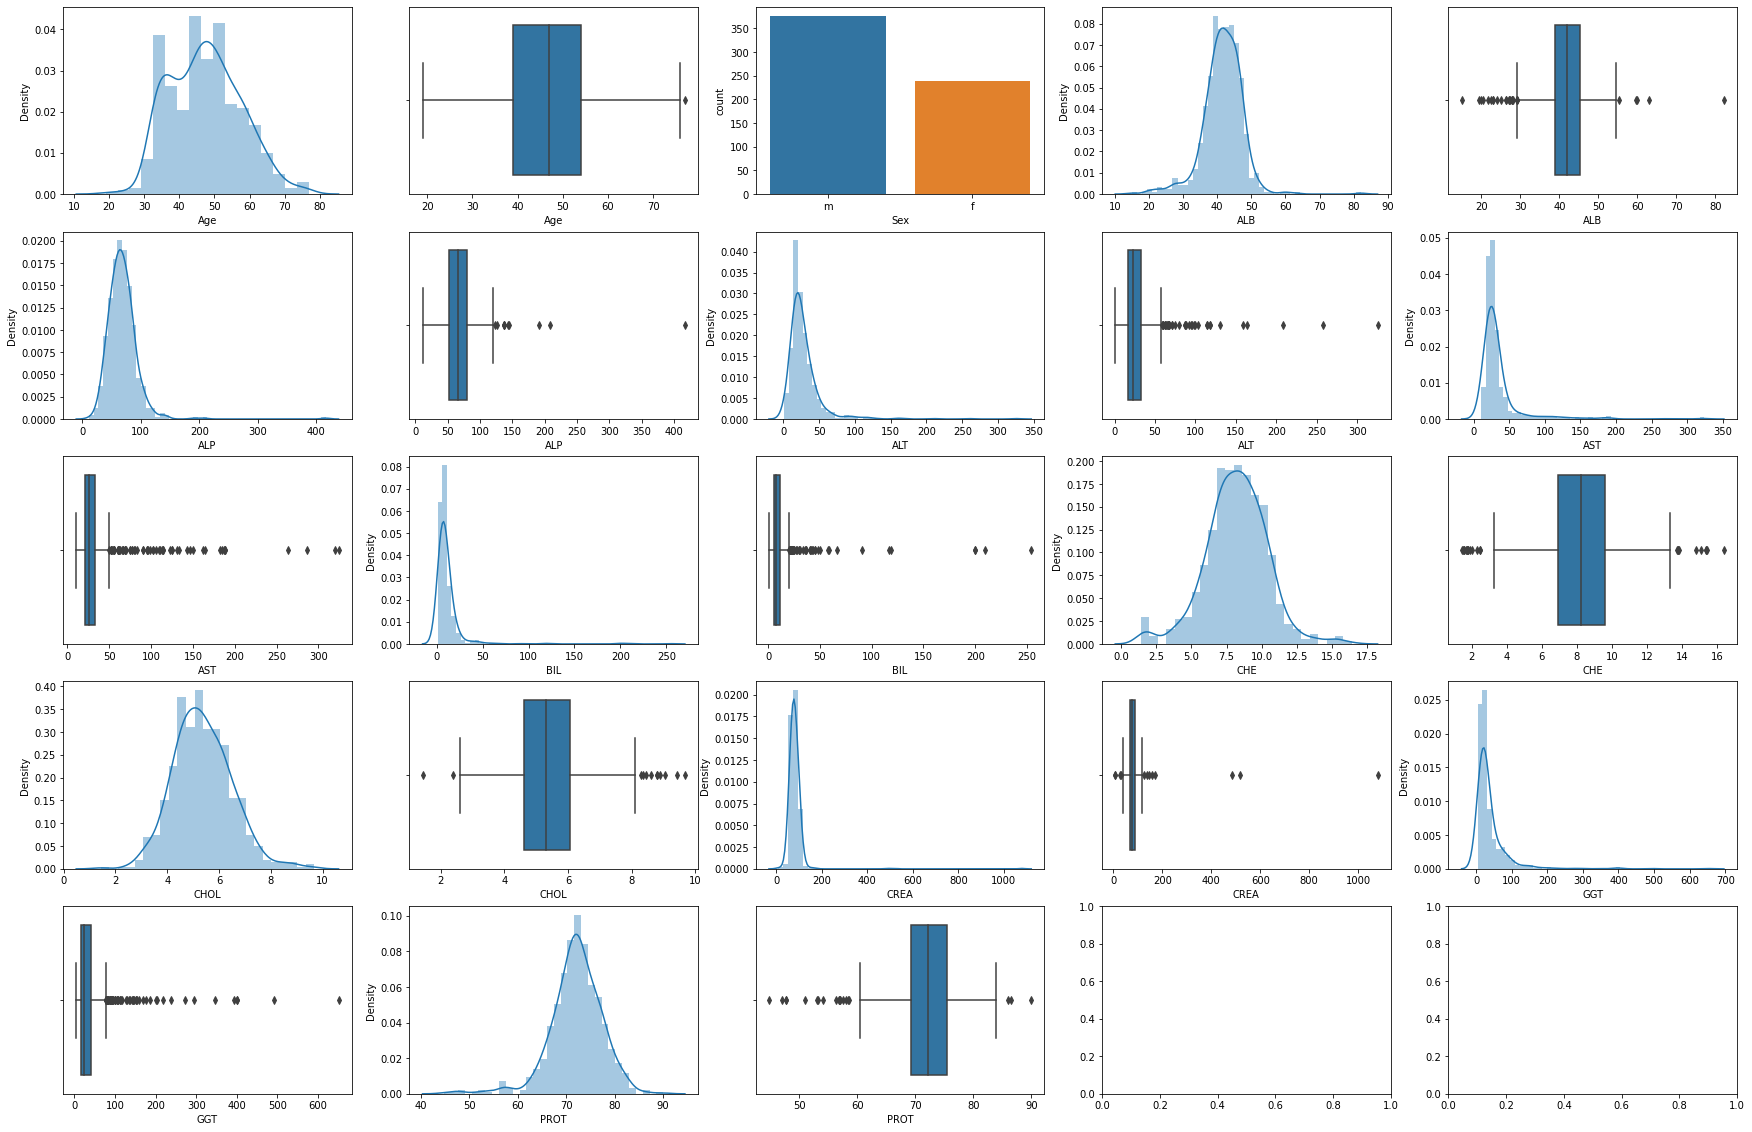

In [ ]:
# reprezentare grafica a datelor

i = 0
j = 0
ncol = 5
nrow = 5
all_cols = df.columns.drop('Category')

fig,axes=plt.subplots(nrows=nrow,ncols=ncol,figsize=(30,20))

for col in all_cols:
  if col in categ_cols:
    sns.countplot(x=col, data=df, ax=axes[i, j])
  elif col in cont_cols:
    sns.distplot(df[col], ax=axes[i, j])
    if j < ncol-1:
      j += 1
    else:
      j = 0
      if i < nrow-1:
        i += 1
      else:
        i = 0
    sns.boxplot(df[col], ax=axes[i, j])
  if j < ncol-1:
    j += 1
  else:
    j = 0
    if i < nrow-1:
      i += 1
    else:
      i = 0
print(all_cols)
print(categ_cols)
print(cont_cols)
# plt.show()

In [ ]:
df.isna().sum()
print('Missing values')
for col in df.columns:
  print('{}: {} ({:.2f}%)'.format(col, df[col].isna().sum(), df[col].isna().sum()/df[col].isna().count()*100))
  

Missing values
Category: 0 (0.00%)
Age: 0 (0.00%)
Sex: 0 (0.00%)
ALB: 1 (0.16%)
ALP: 18 (2.93%)
ALT: 1 (0.16%)
AST: 0 (0.00%)
BIL: 0 (0.00%)
CHE: 0 (0.00%)
CHOL: 10 (1.63%)
CREA: 0 (0.00%)
GGT: 0 (0.00%)
PROT: 1 (0.16%)


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10
GGT,615.0,39.533171,54.661071,4.50,15.700,23.30,40.200,650.90


In [ ]:
Q1 = np.percentile(df.AST, [25, 50, 75])[0]
Q3 = np.percentile(df.AST, [25, 50, 75])[2]
print(Q1)
print(Q3)

IQR = Q3-Q1
df['l_AST'] = Q1-1.5*IQR
df['h_AST'] = Q3+1.5*IQR
df




21.6
32.9


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,l_AST,h_AST
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,4.65,49.85
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,4.65,49.85
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,4.65,49.85
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,4.65,49.85
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,4.65,49.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,4.65,49.85
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,4.65,49.85
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,4.65,49.85
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,4.65,49.85


In [ ]:
Q1 = np.percentile(df.GGT, [25, 50, 75])[0]
Q3 = np.percentile(df.GGT, [25, 50, 75])[2]

IQR = Q3 - Q1 

df['l_GGT'] = Q1 - 1.5*IQR
df['h_GGT'] = Q3 + 1.5*IQR
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,l_AST,h_AST,l_GGT,h_GGT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,4.65,49.85,-21.05,76.95
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,4.65,49.85,-21.05,76.95
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,4.65,49.85,-21.05,76.95
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,4.65,49.85,-21.05,76.95
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,4.65,49.85,-21.05,76.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,4.65,49.85,-21.05,76.95
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,4.65,49.85,-21.05,76.95
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,4.65,49.85,-21.05,76.95
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,4.65,49.85,-21.05,76.95


In [ ]:
def plot_var(df, col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    if continuous == True:
      f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    else:
      f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(12,3), dpi=90)


    
    # Plot without outcome
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='Category', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Category')
    else:
        charge_off_rates = df.groupby(col_name)['Category'].value_counts(normalize=True).loc[:,'0s=suspect Blood Donor']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        charge_off_rates = df.groupby(col_name)['Category'].value_counts(normalize=True).loc[:,'1=Hepatitis']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax3)
        charge_off_rates = df.groupby(col_name)['Category'].value_counts(normalize=True).loc[:,'2=Fibrosis']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax4)
        charge_off_rates = df.groupby(col_name)['Category'].value_counts(normalize=True).loc[:,'3=Cirrhosis']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax5)
        ax2.set_ylabel('Fraction of Hepatitis disease')
        ax2.set_title('Hepatitis Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

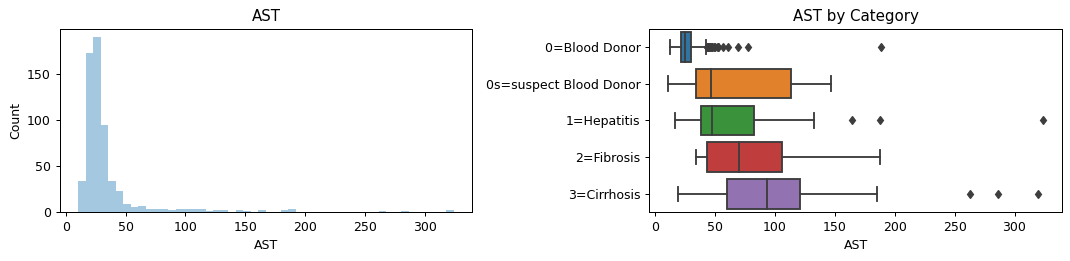

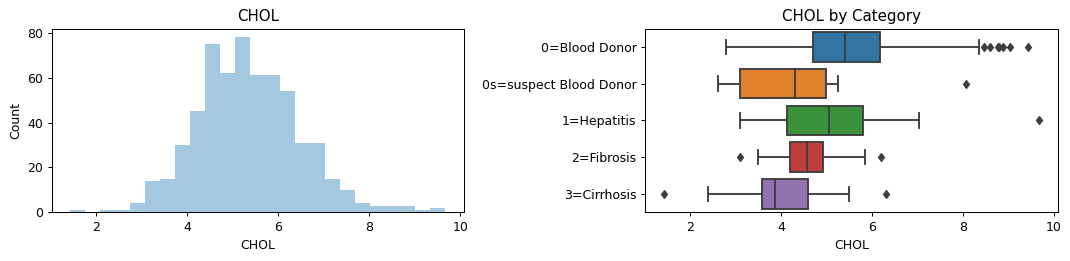

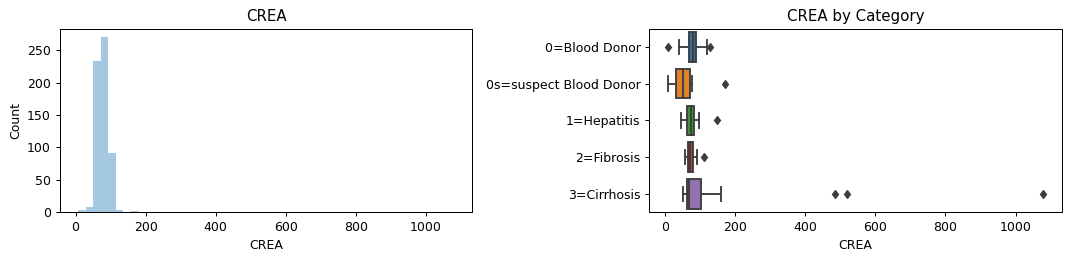

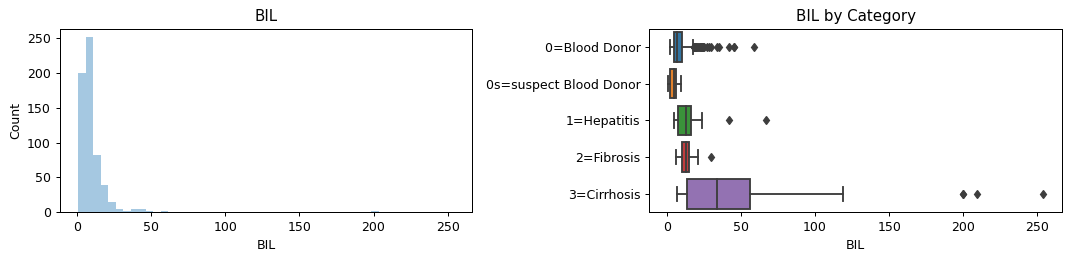

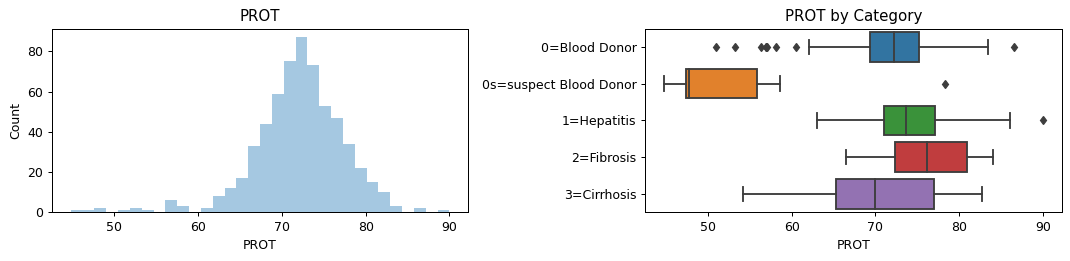

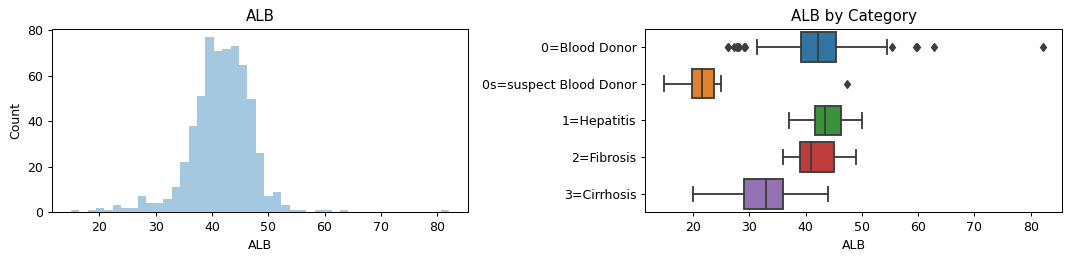

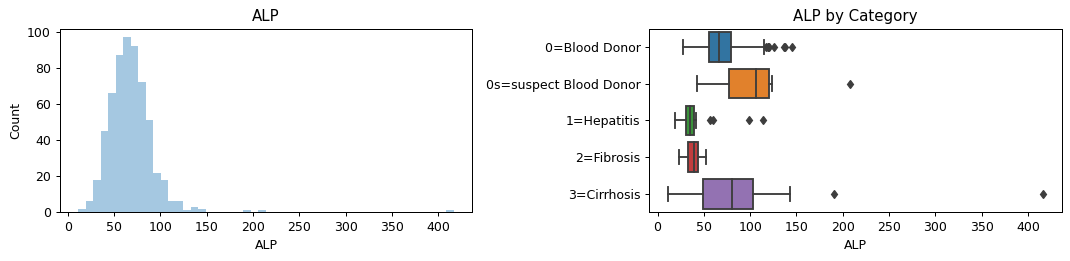

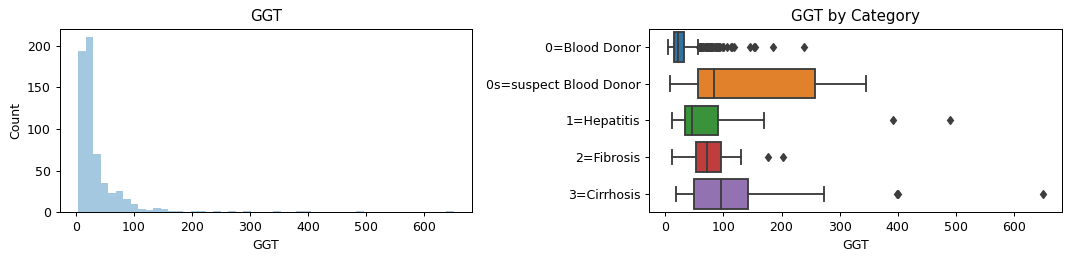

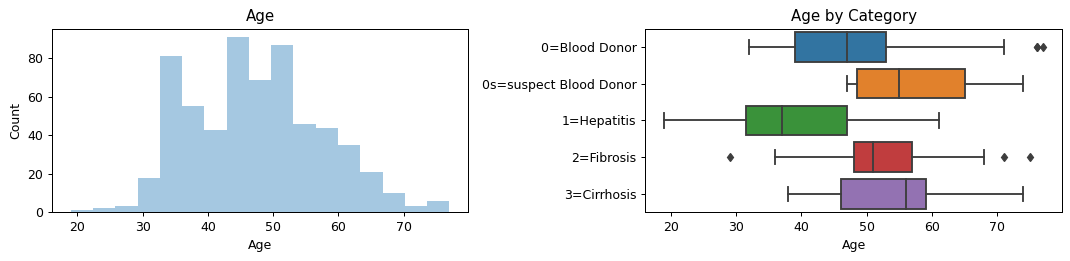

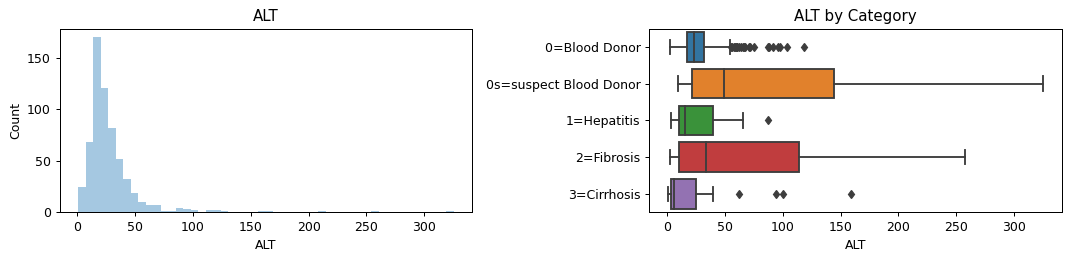

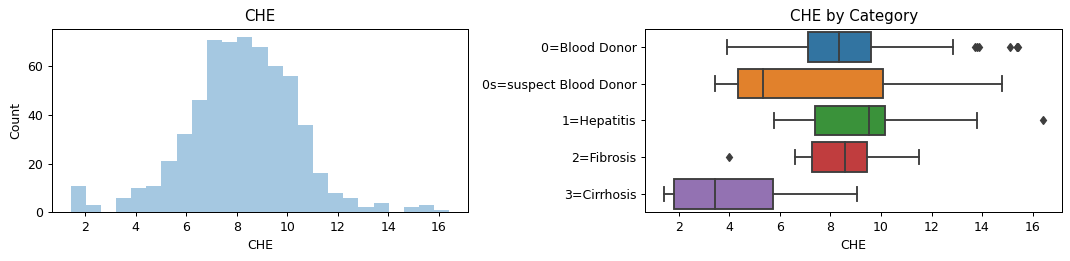

In [ ]:
for col in cont_cols:
  plot_var(df, col, col, continuous=True)

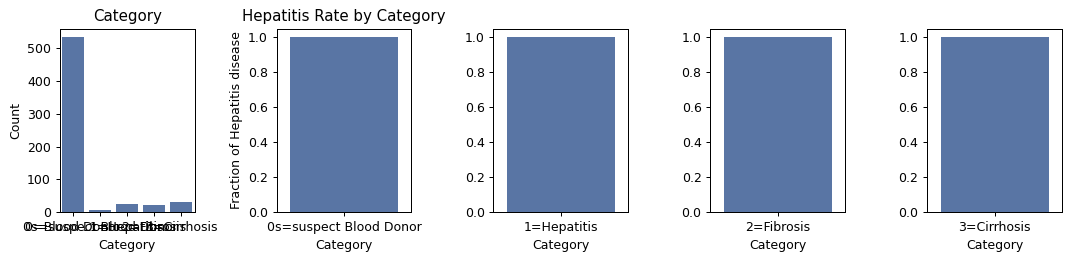

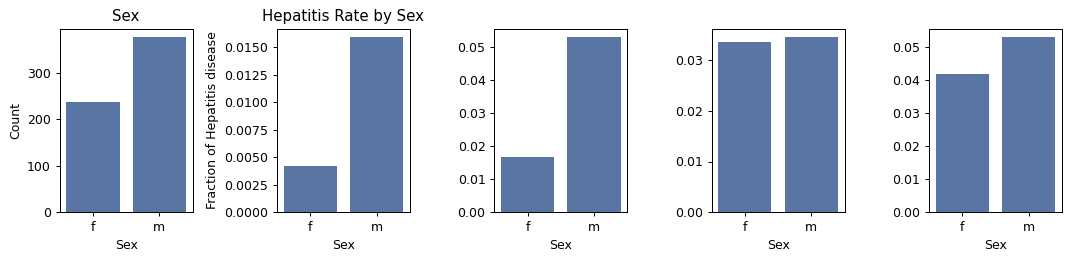

In [ ]:
for col in categ_cols:
  plot_var(df, col, col, continuous=False)

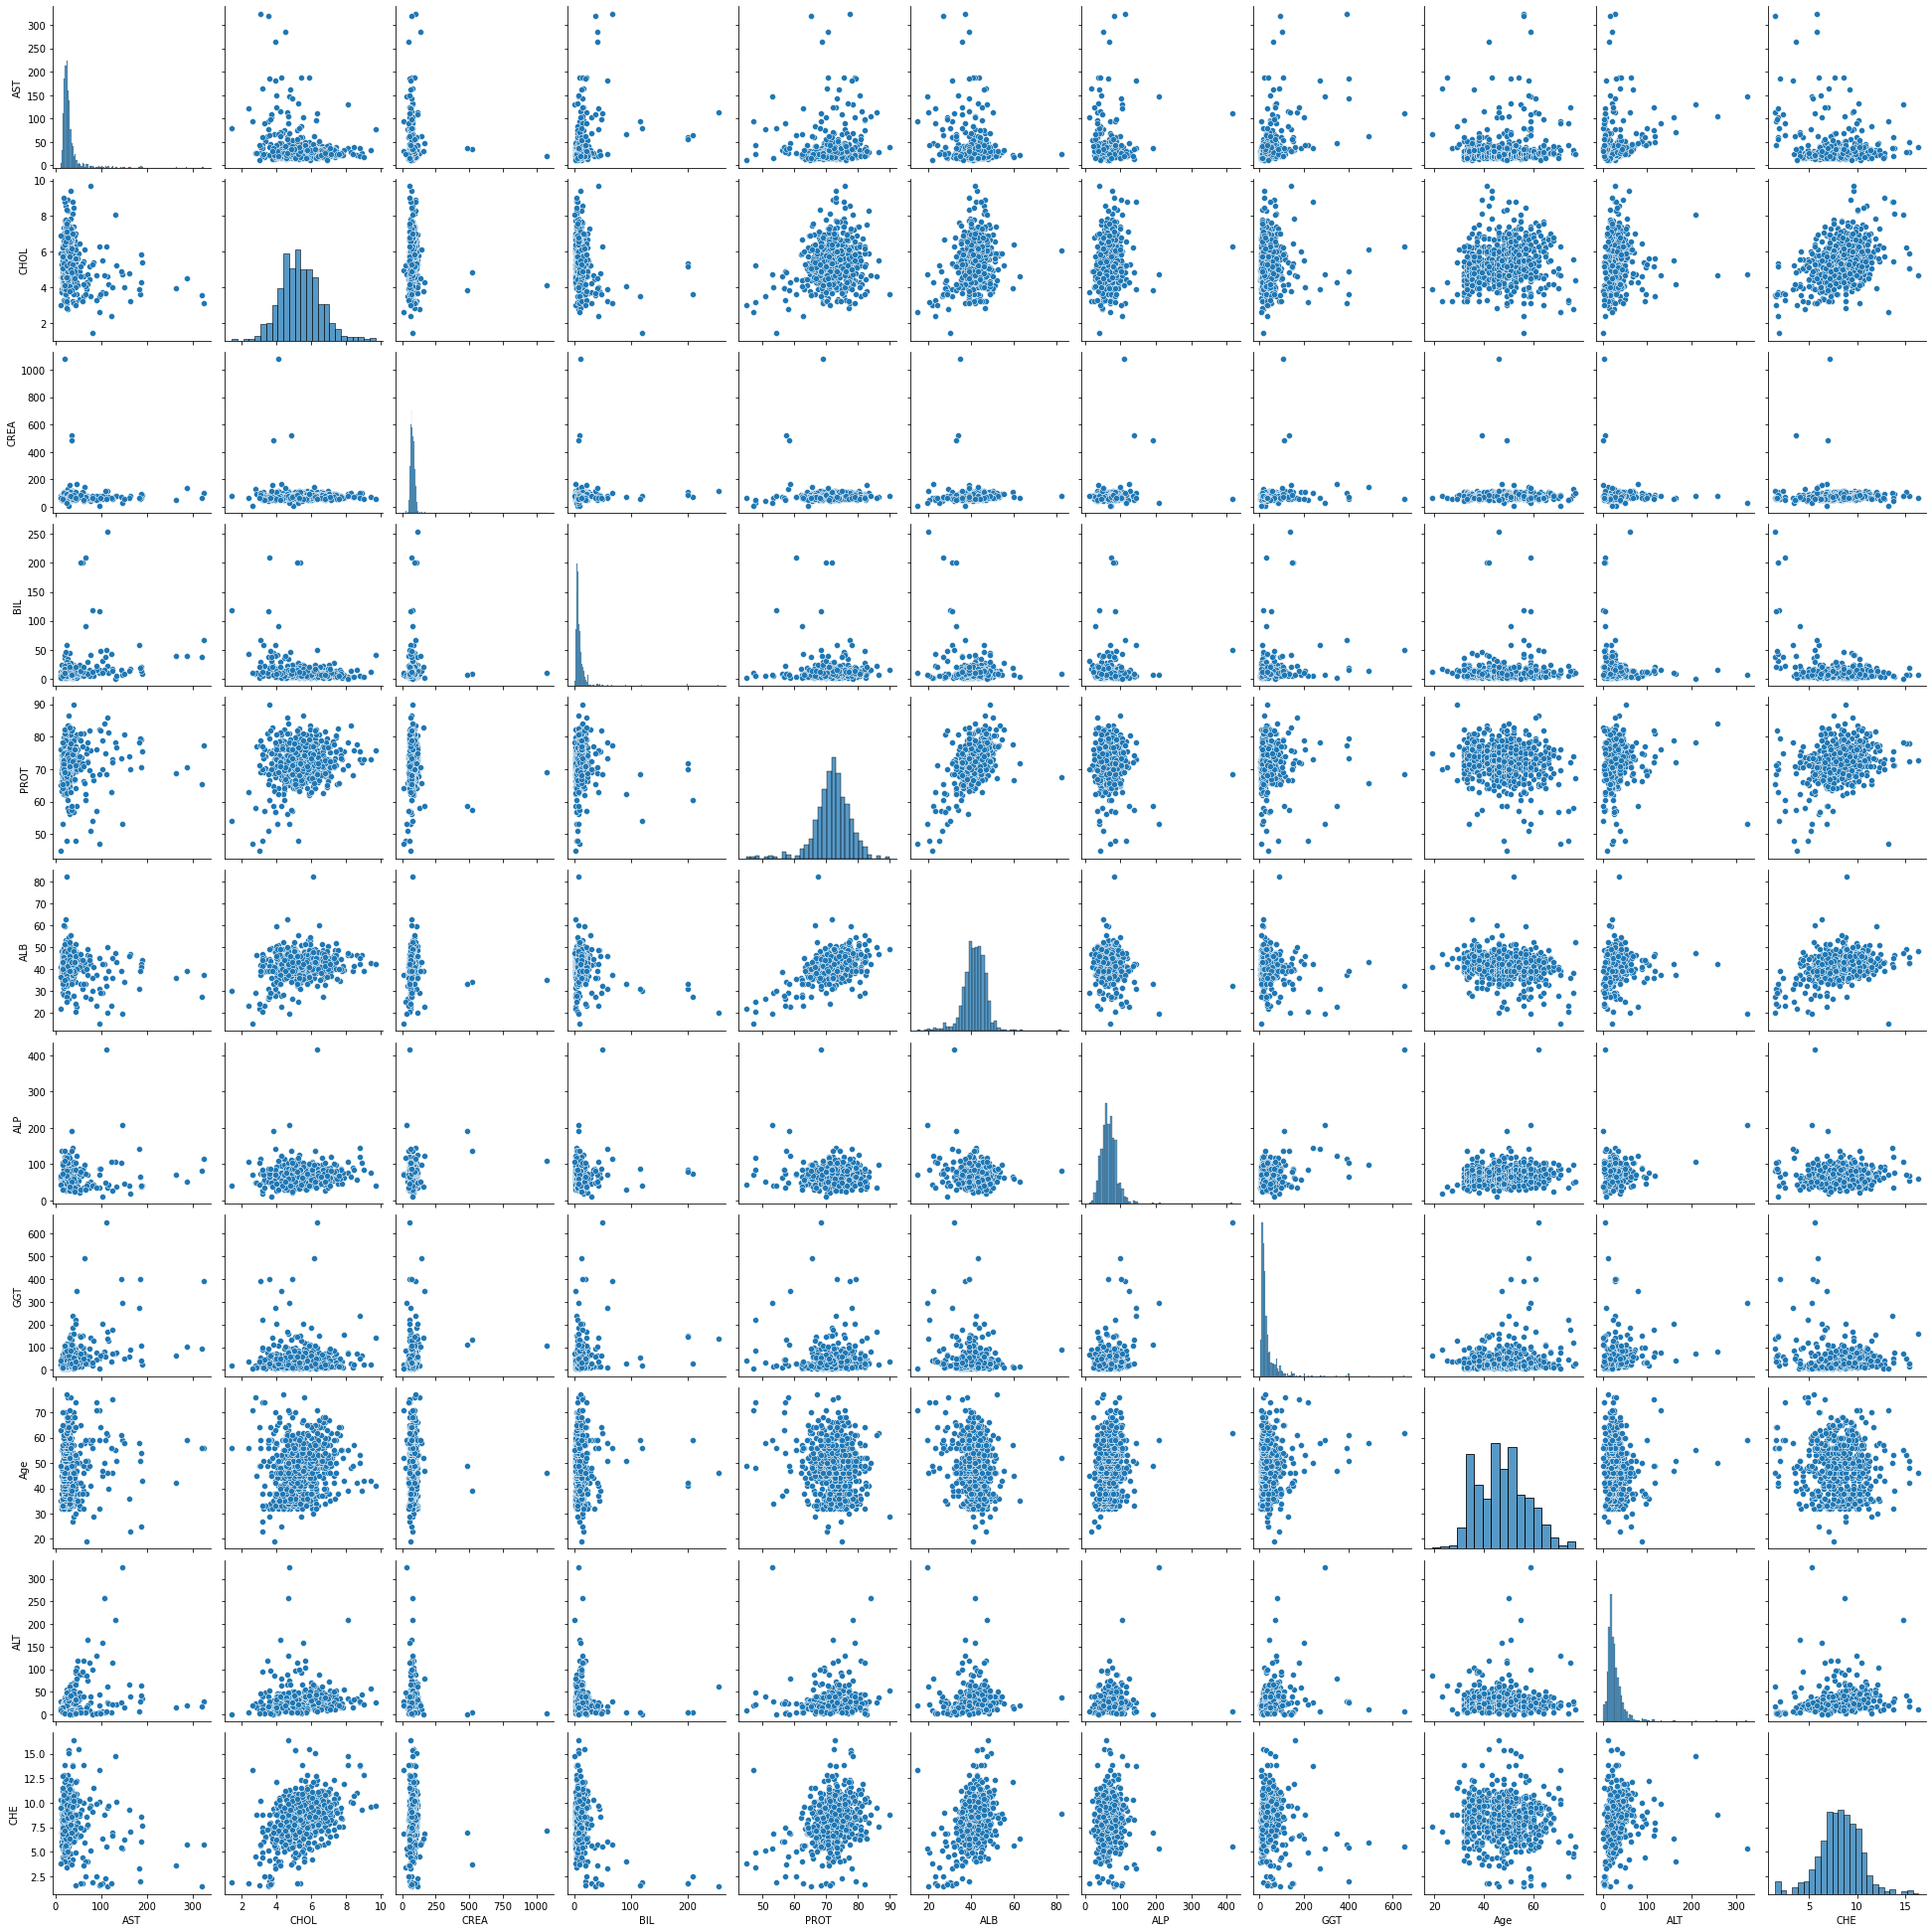

In [ ]:
sns.pairplot(df[cont_cols])
plt.show()

In [ ]:
df['Category2'] = df['Category'].replace({'0=Blood Donor' : 1, '0s=suspect Blood Donor': 2, '2=Fibrosis': 3, '1=Hepatitis': 4, '3=Cirrhosis': 5})
df['Sex2'] = df['Sex'].replace({'m' : 0, 'f': 2})

cont_cols.append('Category2')
cont_cols

['AST',
 'CHOL',
 'CREA',
 'BIL',
 'PROT',
 'ALB',
 'ALP',
 'GGT',
 'Age',
 'ALT',
 'CHE',
 'Category2']

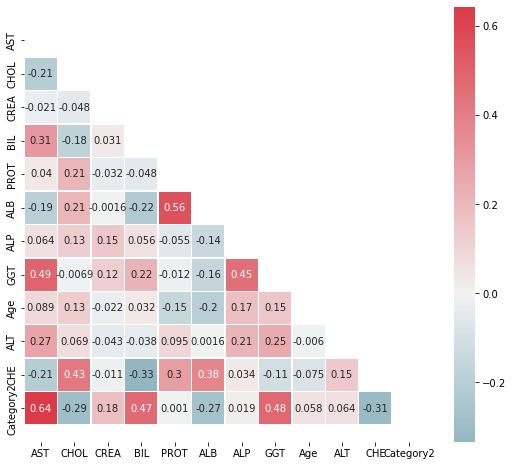

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[cont_cols].corr(),mask=np.triu(np.ones_like(df[cont_cols].corr(),dtype=np.bool)),center=0,annot=True,ax=ax,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),linewidth=.5,square=True)

b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)

plt.show()

## Testare ipotezelor statistice

Pentru testarea pe doua populatii independente (adica nu sunt aceiasi in cele doua esantioane), e nevoie de testarea diferentelor dintre dispersii, iar asta se face cu testul levene, pentru ipoteze sunt:

* H0: dispersiile sunt egale (p-value > 0.05)
* H1: dispersiile difera (p-value < 0.05)


In [ ]:
df.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [ ]:
def variance_testing (df, col):
  yes = df[df['Category'] == '1=Hepatitis'][col].dropna()
  no = df[df['Category'] == '0=Blood Donor'][col].dropna()
  print('\n',col)
  display(st.levene(yes, no, center='median', proportiontocut=0.05))

In [ ]:
print(cont_cols)
# cont_cols.remove('Category2')

['AST', 'CHOL', 'CREA', 'BIL', 'PROT', 'ALB', 'ALP', 'GGT', 'Age', 'ALT', 'CHE']


['AST',
 'CHOL',
 'CREA',
 'BIL',
 'PROT',
 'ALB',
 'ALP',
 'GGT',
 'Age',
 'ALT',
 'CHE']

In [ ]:
for col in cont_cols:
  variance_testing(df, col)


 AST


LeveneResult(statistic=112.11539293391932, pvalue=5.478023974564127e-24)


 CHOL


LeveneResult(statistic=2.8331248589020923, pvalue=0.09290808408955444)


 CREA


LeveneResult(statistic=0.5953108928181907, pvalue=0.4407011246461462)


 BIL


LeveneResult(statistic=9.788487332983962, pvalue=0.0018482592195912763)


 PROT


LeveneResult(statistic=3.0550081665322586, pvalue=0.08104157498600731)


 ALB


LeveneResult(statistic=1.624374127966514, pvalue=0.20301631378488041)


 ALP


LeveneResult(statistic=0.2991809181623196, pvalue=0.5846174142777931)


 GGT


LeveneResult(statistic=55.228531689663654, pvalue=4.0820916143861495e-13)


 Age


LeveneResult(statistic=1.1282909677924076, pvalue=0.2886021493373779)


 ALT


LeveneResult(statistic=8.087460970913192, pvalue=0.00462185499016524)


 CHE


LeveneResult(statistic=1.7102573694836147, pvalue=0.19149341592085645)

Interpretare:
dispersiile sunt egale pentru ce am pus mai jos in 'equal_variance' si diferite pentru restul, pentru ca p-value < 0.05 unde nu sunt egale

p < 0.05 => H1 - dispersiile difera -- AST, CREA, BIL, GGT, ALT

In [ ]:
diff_variance = ['AST', 'GGT', 'CREA', 'BIL', 'ALT']
equal_variance = list(set(cont_cols)-set(diff_variance))
print(diff_variance)

['AST', 'GGT', 'CREA', 'BIL', 'ALT']


### T-test
Se foloseste pentru testarea diferentelor dintre mediile de grupa pentru cele doua esantioane (in cazul nostru cei cu si fara hepatita)

Ipoteze (in general, **col** se inlocuieste cu denumirea coloanei de interes):

* H0: valorile medii ale **col** nu difera intre cei cu si fara hepatita
* H1: valorile medii ale **col** pentru cei cu diabet sunt mai mari decat ale celor fara hepatita


In [ ]:
# def hyp_test(df,col, eq_var):
#   yes = df[df['Category'] == '1=Hepatitis'][col].dropna()
#   no = df[df['Category'] == '0=Blood Donor'][col].dropna()
#   print('\n',col)
#   display(st.ttest_ind(yes, no, equal_var=eq_var, alternative='greater'))

In [ ]:
# for col in cont_cols:
#   if col in diff_variance:
#     hyp_test(df, col, False)
#   else:
#     hyp_test(df, col, True)


 AST


Ttest_indResult(statistic=3.501336519167005, pvalue=0.0009586690263474983)


 CHOL


Ttest_indResult(statistic=-1.75511023738893, pvalue=0.9601003920332694)


 CREA


Ttest_indResult(statistic=-1.2290885317355527, pvalue=0.8845547484013442)


 BIL


Ttest_indResult(statistic=2.56997521797141, pvalue=0.008491369400199126)


 PROT


Ttest_indResult(statistic=2.6829884003865994, pvalue=0.003757174537874971)


 ALB


Ttest_indResult(statistic=1.5346683333578008, pvalue=0.06271757965793884)


 ALP


Ttest_indResult(statistic=-6.39692860769226, pvalue=0.9999999998308031)


 GGT


Ttest_indResult(statistic=2.66548376684009, pvalue=0.00689503027503437)


 Age


Ttest_indResult(statistic=-4.160822504864351, pvalue=0.999981628238588)


 ALT


Ttest_indResult(statistic=0.05648694716361728, pvalue=0.4777231228443854)


 CHE


Ttest_indResult(statistic=2.220903236315993, pvalue=0.013380197066135857)

 # Trebuie ANOVA pentru ca sunt mai multe categorii
 
 
 #### Pentru ca p(eroarea) < 0.05 la AST, BIL, PROT, GGT, ALT, CHE => H1- valorile lor medii sunt mai mari la cei cu hepatita decat la cei fara hepatita

 #### In rest pentru celalate p>0.05 -> H0 asta insemana ca valorile lor medii nu difera la cei cu hepatita fata de cei fara hepatita
 -> Cholesterol, Creatinina, Albumina, Varsta, 



  Fhosfataza Alkalina(ALP)-> nu prea are sens

  CHE - colinesteraza serica -> NU are sens

# ANOVA

---




In [ ]:
for col in cont_cols:
  print(col)
  display(st.f_oneway(
      df[col][df['Category2'] == 1].dropna(),
      df[col][df['Category2'] == 2].dropna(),
      df[col][df['Category2'] == 3].dropna(),
      df[col][df['Category2'] == 4].dropna(),
      df[col][df['Category2'] == 5].dropna()
  ))
# df.Category2.value_counts()

AST


F_onewayResult(statistic=115.11130516469649, pvalue=4.2624013356217017e-73)

CHOL


F_onewayResult(statistic=17.191785146208222, pvalue=2.3226282034964914e-13)

CREA


F_onewayResult(statistic=11.355391957700467, pvalue=6.790382251210605e-09)

BIL


F_onewayResult(statistic=68.39914399410966, pvalue=7.904114017847861e-48)

PROT


F_onewayResult(statistic=29.85170161274778, pvalue=1.0713734194047205e-22)

ALB


F_onewayResult(statistic=46.8322525819678, pvalue=2.479755111311526e-34)

ALP


F_onewayResult(statistic=21.437583142330297, pvalue=1.5684998860272384e-16)

GGT


F_onewayResult(statistic=55.60242570001431, pvalue=5.485132655627596e-40)

Age


F_onewayResult(statistic=11.040693045945156, pvalue=1.1903892225531112e-08)

ALT


F_onewayResult(statistic=27.629757391039803, pvalue=4.2243473557558714e-21)

CHE


F_onewayResult(statistic=40.684700827967454, pvalue=3.090915614165375e-30)


 #### In rest pentru celalate p < 0.05 -> H1 asta insemana ca valorile lor medii  difera la cei cu hepatita fata de cei fara hepatita la toate analizele masurate